In [12]:
from datasets import load_dataset

# Load private dataset
#dataset = load_dataset("mikeriess/LM_Da_test_100_llama-3.3-70b-instruct")
#dataset = load_dataset("mikeriess/LM_Da_test_100_llama-3.1-405b-instruct-fp8")
dataset = load_dataset("mikeriess/LM_dialogues1", revision="0827e2f7f30c6192f71113ab579067c4fbda3b0f")

In [13]:
# Convert to pandas and then to dictionary format
df = dataset['train'].to_pandas()
df.head()

,model,conversation_id,orig_messages,synthetic_messages,orig_message_count,synthetic_message_count,message_count_diff,orig_total_length,synthetic_total_length,orig_total_tokens,synthetic_total_tokens
0,meta-llama/Llama-3.1-405B-Instruct-FP8,65536,"[{'order': 1, 'text': 'Go for it: [URL] MP3 fi...","[{'order': 1, 'text': 'Hej, jeg prøver at down...",3,3,0,304,98,57,98
1,meta-llama/Llama-3.1-405B-Instruct-FP8,65538,"[{'order': 1, 'text': '[URL] Little AlterBoy: ...","[{'order': 1, 'text': 'Hej, jeg søger en plugi...",8,8,0,473,151,88,151
2,meta-llama/Llama-3.1-405B-Instruct-FP8,65539,"[{'order': 1, 'text': 'Jeg er begyndt at have ...","[{'order': 1, 'text': 'Hej, jeg håber nogen ka...",1,1,0,432,45,75,45
3,meta-llama/Llama-3.1-405B-Instruct-FP8,65544,"[{'order': 1, 'text': 'Looper og syncer dårlig...","[{'order': 1, 'text': 'Hej, jeg har et problem...",2,2,0,481,70,90,70
4,meta-llama/Llama-3.1-405B-Instruct-FP8,65547,"[{'order': 1, 'text': 'Hej Min kammerat og jeg...","[{'order': 1, 'text': 'Hej, jeg søger hjælp ti...",6,6,0,2796,324,503,324


In [14]:
print(df.loc[53]['synthetic_messages'])

[{'order': 1, 'text': 'Hvordan håndterer I jeres daglige opgaver, og hvad bruger I til at organisere jeres arbejde?', 'turn': 1, 'user': 1}
 {'order': 2, 'text': 'Vi bruger en kombination af forskellige værktøjer til at håndtere vores daglige opgaver. Vi har en fælles kalender, hvor vi planlægger møder og deadlines, og vi bruger også et projektstyringsværktøj til at holde styr på vores opgaver og fremdrift.', 'turn': 1, 'user': 2}
 {'order': 3, 'text': 'Det lyder interessant. Hvad er det for et projektstyringsværktøj, I bruger? Er det noget, I selv har udviklet, eller er det en kommerciel løsning?', 'turn': 2, 'user': 1}
 {'order': 4, 'text': 'Vi bruger en kommerciel løsning, som hedder "ProjektPlan". Det er et meget brugervenligt værktøj, som giver os en god oversigt over vores opgaver og fremdrift. Vi har også mulighed for at tildele opgaver til specifikke medarbejdere og følge deres fremdrift.', 'turn': 2, 'user': 2}
 {'order': 5, 'text': 'Det lyder som en meget nyttig løsning. Har 

In [15]:
print(df.loc[53]['orig_messages'])

[{'order': 1, 'text': 'Hvordan gør i og hvad bruger i...??', 'user': 8.0}
 {'order': 2, 'text': "Pre-mastering er faktisk den korrekte tekniske betegnelse for det mange kalder mastering.\nMastering er virkeligheden den egentlige fysiske process når cd'en laves til en master, ikke lydbehandlingen (som altså kaldes pre-mastering).\nSå når du siger pre-mastering hvad mener du så?\nMan bør nemlig ikke på nogen måde behandle mixet med eq/comp/limiter inden det afleveres til mastering. Har du en god analog sum comp som du har mixet igennem, så kan man måske lade den sidde på, men ikke andet.", 'user': 2.0}
 {'order': 3, 'text': 'jeg mener mere det at når man skal præsentere et mix til Hr. Pladeselskab om man gerne vil have at de bliver blæst...jeg ved godt at man ikke skal regne med at et stykke software ikke er det helt optimale men det kunne godt være at der var en der gjorde det ok..!tit når man bruger en "Finalizer" eller lign så sys jeg faktisk at den ødelægger mere end den fixer...er d

# Inspect original vs synthetic messages

In [16]:
def inspect_conversation_pair(df, idx):
    """
    Display original and synthetic messages side by side for a given conversation index
    """
    orig = df.iloc[idx]['orig_messages']
    synth = df.iloc[idx]['synthetic_messages']
    
    print(f"Conversation #{idx}")
    print("=" * 100)
    print("\nOriginal Messages:")
    print("-" * 50)
    for msg in orig:
        print(f"Turn {msg['order']} (User {msg.get('user', 'N/A')}):")
        print(f"{msg['text']}\n")
    
    print("\nSynthetic Messages:")
    print("-" * 50)
    for msg in synth:
        print(f"Turn {msg['order']} (User {msg.get('user', 'N/A')}):")
        print(f"{msg['text']}\n")
    
    print("=" * 100)

# Example usage:
inspect_conversation_pair(df, 5)  # View first conversation


Conversation #5

Original Messages:
--------------------------------------------------
Turn 1 (User 82.0):
[URL]
Sonormed, som er en nystartet virksomhed, har langseret en ny app som påståeligt kan helbrede eller lindre tinnitus symptomer.
Konceptet bag teknologien er baseret på at man først finder sin tinnitus frekvens, og derefter filtrerer app'en den frekvens fra din musiksamling. 
Ved at lytte til disse filtrerede versioner i 1-2 timer hver dag i minimum 6 måneder skulle man altså opnå en kraftig forbedring af symptomer.
Læs selv mere her:
[URL]

Turn 2 (User 45.0):
interresant ! har hyletone selv igennem mange år.

Turn 3 (User 20840.0):
Kan ikke kureres, da fimrehårene er blevet stive af at vibrere til alle de højeste frekvenser, de sender derfor en næsten konstant tone, det er det som hyler.
Kan løses på indivuduel basis med et høre apparat der modificerer. Min ven har sådanne.
Og så sjovt nok.. man har superhørelse og syn i nogle drømme.

Turn 4 (User 1684.0):
Det du her refere

## Tokens
## Current prompt: Asking to keep same number of posts

In [17]:
df.columns

Index(['model', 'conversation_id', 'orig_messages', 'synthetic_messages',
       'orig_message_count', 'synthetic_message_count', 'message_count_diff',
       'orig_total_length', 'synthetic_total_length', 'orig_total_tokens',
       'synthetic_total_tokens'],
      dtype='object')

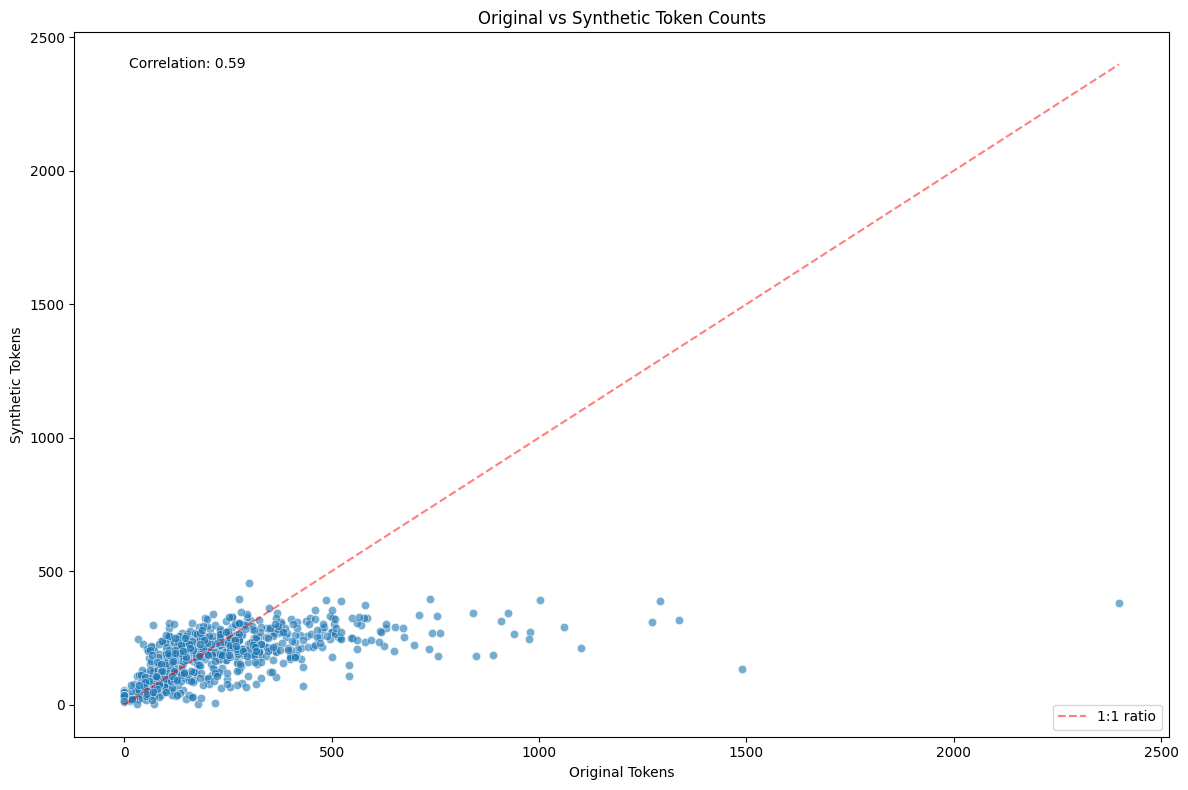


Token Count Statistics:
--------------------------------------------------
Average original tokens: 228.0
Average synthetic tokens: 175.9

Median original tokens: 181.0
Median synthetic tokens: 189.0

Max original tokens: 2398.0
Max synthetic tokens: 455.0

Correlation coefficient: 0.592


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, 
                x='orig_total_tokens', 
                y='synthetic_total_tokens',
                alpha=0.6)

# Add diagonal line representing y=x
max_tokens = max(df['orig_total_tokens'].max(), df['synthetic_total_tokens'].max())
plt.plot([0, max_tokens], [0, max_tokens], 'r--', alpha=0.5, label='1:1 ratio')

# Customize plot
plt.title('Original vs Synthetic Token Counts')
plt.xlabel('Original Tokens')
plt.ylabel('Synthetic Tokens')
plt.legend()

# Add correlation coefficient
correlation = df['orig_total_tokens'].corr(df['synthetic_total_tokens'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)
"""
# Optional: Add hover annotations
for idx, row in df.iterrows():
    plt.annotate(f'Conv #{idx}',
                (row['orig_total_tokens'], row['synthetic_total_tokens']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.5)
"""
plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nToken Count Statistics:")
print("-" * 50)
print(f"Average original tokens: {df['orig_total_tokens'].mean():.1f}")
print(f"Average synthetic tokens: {df['synthetic_total_tokens'].mean():.1f}")
print(f"\nMedian original tokens: {df['orig_total_tokens'].median():.1f}")
print(f"Median synthetic tokens: {df['synthetic_total_tokens'].median():.1f}")
print(f"\nMax original tokens: {df['orig_total_tokens'].max():.1f}")
print(f"Max synthetic tokens: {df['synthetic_total_tokens'].max():.1f}")
print(f"\nCorrelation coefficient: {correlation:.3f}")


## Previous prompt: 
### Not explicitly asking to generate the same number of posts

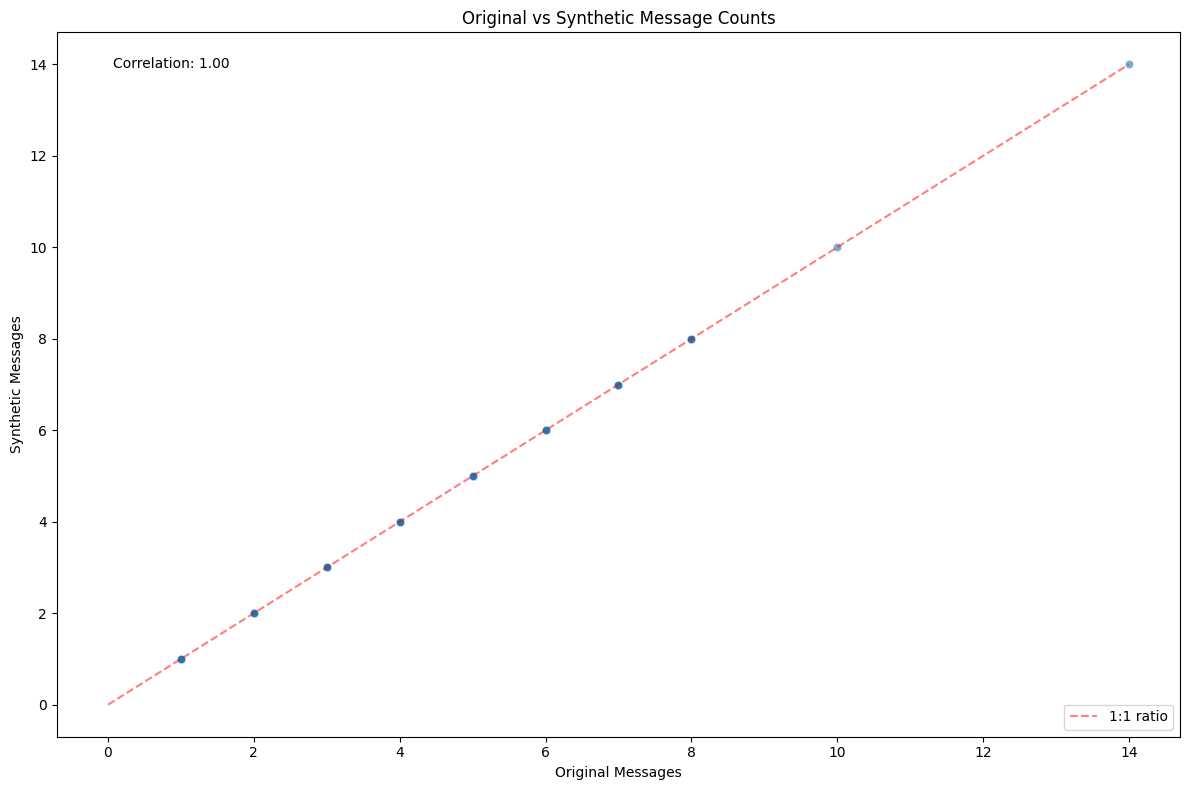


Message Count Statistics:
--------------------------------------------------
Average original messages: 4.4
Average synthetic messages: 4.4

Median original messages: 5.0
Median synthetic messages: 5.0

Correlation coefficient: 1.000


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot for message counts
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, 
                x='orig_message_count', 
                y='synthetic_message_count',
                alpha=0.6)

# Add diagonal line representing y=x
max_count = max(df['orig_message_count'].max(), df['synthetic_message_count'].max())
plt.plot([0, max_count], [0, max_count], 'r--', alpha=0.5, label='1:1 ratio')

# Customize plot
plt.title('Original vs Synthetic Message Counts')
plt.xlabel('Original Messages')
plt.ylabel('Synthetic Messages')
plt.legend()

# Add correlation coefficient
correlation = df['orig_message_count'].corr(df['synthetic_message_count'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)

"""
# Optional: Add hover annotations
for idx, row in df.iterrows():
    plt.annotate(f'Conv #{idx}',
                (row['orig_message_count'], row['synthetic_message_count']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.5)
"""
plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nMessage Count Statistics:")
print("-" * 50)
print(f"Average original messages: {df['orig_message_count'].mean():.1f}")
print(f"Average synthetic messages: {df['synthetic_message_count'].mean():.1f}")
print(f"\nMedian original messages: {df['orig_message_count'].median():.1f}")
print(f"Median synthetic messages: {df['synthetic_message_count'].median():.1f}")
print(f"\nCorrelation coefficient: {correlation:.3f}")

# Number of users

In [11]:
# Function to extract unique users from messages
def get_unique_users(messages):
    users = set()
    for msg in messages:
        # Handle both float and int user IDs
        if 'user' in msg:
            user_id = int(float(msg['user'])) if isinstance(msg['user'], (int, float)) else msg['user']
            users.add(user_id)
    return users

# Compare user counts for each conversation
results = []
for idx, row in df.iterrows():
    orig_users = get_unique_users(row['orig_messages'])
    synth_users = get_unique_users(row['synthetic_messages'])
    
    results.append({
        'conversation_id': row['conversation_id'],
        'orig_user_count': len(orig_users),
        'synth_user_count': len(synth_users),
        'orig_users': sorted(list(orig_users)),
        'synth_users': sorted(list(synth_users))
    })

# Convert to DataFrame for easy viewing
import pandas as pd
comparison_df = pd.DataFrame(results)

# Display summary statistics
print("Summary of user counts:")
print(comparison_df[['orig_user_count', 'synth_user_count']].describe())

# Display first few rows with full details
print("\nSample comparisons:")
print(comparison_df.head())

# Find conversations with mismatched user counts
mismatched = comparison_df[comparison_df['orig_user_count'] != comparison_df['synth_user_count']]
print(f"\nNumber of conversations with mismatched user counts: {len(mismatched)}")
if len(mismatched) > 0:
    print("\nSample of mismatched conversations:")
    print(mismatched.head())

Summary of user counts:
       orig_user_count  synth_user_count
count       734.000000        734.000000
mean          3.051771          1.850136
std           1.413264          0.357181
min           1.000000          1.000000
25%           2.000000          2.000000
50%           3.000000          2.000000
75%           4.000000          2.000000
max           7.000000          2.000000

Sample comparisons:
   conversation_id  orig_user_count  synth_user_count  \
0            65536                2                 2   
1            65538                7                 2   
2            65539                1                 1   
3            65544                2                 2   
4            65547                6                 2   

                                   orig_users synth_users  
0                                   [37, 193]      [1, 2]  
1     [37, 82, 155, 1684, 1944, 21998, 23371]      [1, 2]  
2                                      [1288]         [1]  
3  

# Number of messages

Message count statistics:

Original messages:
count    734.000000
mean       4.352861
std        2.027643
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       14.000000
Name: orig_message_count, dtype: float64

Synthetic messages:
count    734.000000
mean       4.352861
std        2.027643
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       14.000000
Name: synth_message_count, dtype: float64

Number of conversations with mismatched message counts: 0
Average difference in message counts (orig - synth): 0.00


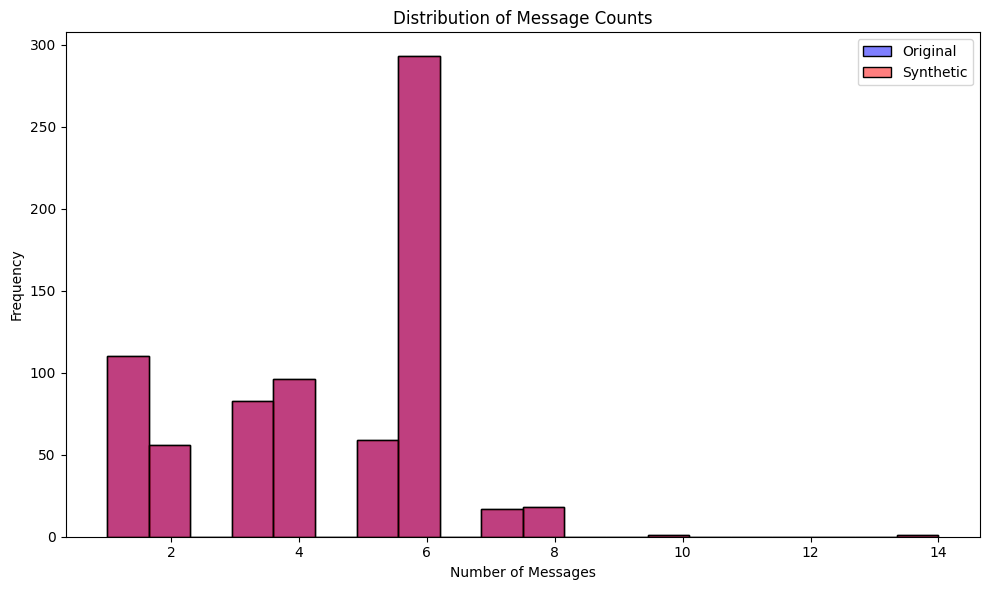

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze message counts in conversations
results = []
for idx, row in df.iterrows():
    results.append({
        'conversation_id': row['conversation_id'],
        'orig_message_count': len(row['orig_messages']),
        'synth_message_count': len(row['synthetic_messages'])
    })

# Convert to DataFrame for easy viewing
comparison_df = pd.DataFrame(results)

# Display summary statistics
print("Message count statistics:")
print("\nOriginal messages:")
print(comparison_df['orig_message_count'].describe())
print("\nSynthetic messages:")
print(comparison_df['synth_message_count'].describe())

# Find conversations with mismatched counts
msg_mismatched = comparison_df[comparison_df['orig_message_count'] != comparison_df['synth_message_count']]
print(f"\nNumber of conversations with mismatched message counts: {len(msg_mismatched)}")

# Calculate average difference
avg_msg_diff = (comparison_df['orig_message_count'] - comparison_df['synth_message_count']).mean()
print(f"Average difference in message counts (orig - synth): {avg_msg_diff:.2f}")

# Create overlapping histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=comparison_df, x='orig_message_count', bins=20, alpha=0.5, label='Original', color='blue')
sns.histplot(data=comparison_df, x='synth_message_count', bins=20, alpha=0.5, label='Synthetic', color='red')
plt.title('Distribution of Message Counts')
plt.xlabel('Number of Messages')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()